In [6]:

import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
import os

 ['MX', 'MY', 'AZ', 'AX', 'MZ', 'AY', 'UN', 'TH', 'GX', 'PG', 'GY', 'PR', 'GZ', 'EA', 'HR', 'SA', 'EL', 'PI', 'SR', 'SF', 'T1']


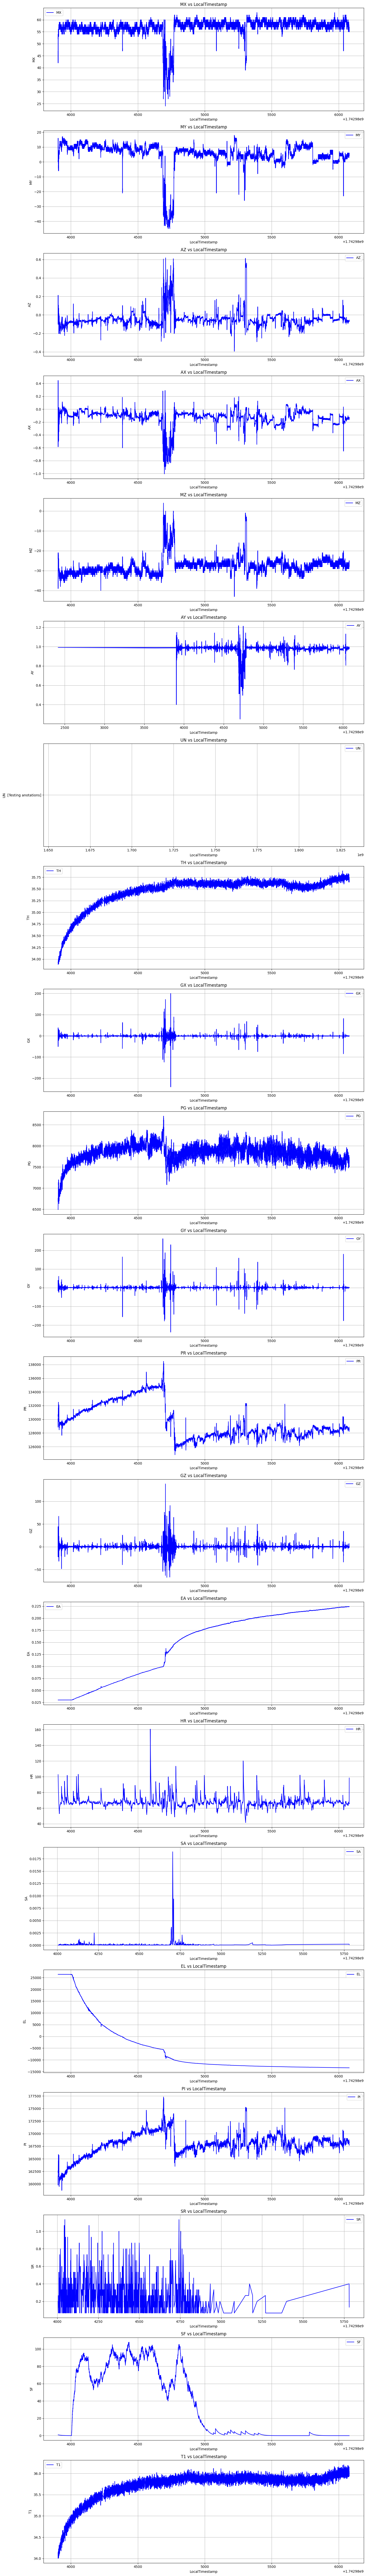

In [8]:
#Retrieving the metrics for a subject, plotting all of them to check raw data
path = "/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/"


metrics = ["EA","EL","SA", "SR", "SF", "PI", "PR", "PG", "HR", "TH", "AX", "AY", "AZ", "GX", "GY", "GZ",
           "MX", "MY", "MZ", "T1", "DC", "DO", "UN"]

files = [file for file in os.listdir(path) if file.endswith(tuple(f'_{s}.csv' for s in metrics))]


data_dict = {}


for file in files:
    metric = file.split('_')[-1].replace('.csv', '')  
    
    df = pd.read_csv(os.path.join(path, file))  
    
    if 'LocalTimestamp' in df.columns:
        df['LocalTimestamp'] = pd.to_numeric(df['LocalTimestamp'], errors='coerce')
    else:
    
        continue  
    
    if metric not in df.columns:
        
        continue  

   
    data_dict[metric] = df


print(f" {list(data_dict.keys())}")


plt.figure(figsize=(15, 5 * len(data_dict)))  

for i, (metric, df) in enumerate(data_dict.items()):
    plt.subplot(len(data_dict), 1, i + 1)
    plt.plot(df['LocalTimestamp'], df[metric], label=metric, color='blue')
    plt.title(f'{metric} vs LocalTimestamp')
    plt.xlabel('LocalTimestamp')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()


plt.tight_layout()
plt.show()


In [ ]:

# Cargar el dataset del EmotiBit
file_path = "your_data.csv"  # Cambia esto por la ruta de tu archivo
df = pd.read_csv(file_path)

# Renombrar columnas según tu dataset
df.rename(columns={"EA": "EDA", "EL": "EDL", "ER": "EDR"}, inplace=True)

# Asegurar que EDA sea un vector unidimensional y sin NaN
eda_signal = df["EDA"].dropna().values.flatten()

In [ ]:
# benchmark


# Simular una señal de referencia con NeuroKit2
sampling_rate = 15  # Asegurar que coincida con la del EmotiBit
simulated_eda = nk.eda_simulate(duration=len(eda_signal)/sampling_rate, sampling_rate=sampling_rate, scr_number=5)

# Procesar ambas señales
signals_emo, info_emo = nk.eda_process(eda_signal, sampling_rate=sampling_rate)
signals_sim, info_sim = nk.eda_process(simulated_eda, sampling_rate=sampling_rate)

# Extraer características de SCR
scr_peaks_emo = info_emo.get("SCR_Peaks", [])
scr_peaks_sim = info_sim.get("SCR_Peaks", [])

# Comparación de estadísticas
features = {
    "Mean EDA (EmotiBit)": signals_emo["EDA_Clean"].mean(),
    "Mean EDA (Simulated)": signals_sim["EDA_Clean"].mean(),
    "Std EDA (EmotiBit)": signals_emo["EDA_Clean"].std(),
    "Std EDA (Simulated)": signals_sim["EDA_Clean"].std(),
    "Number of SCR Peaks (EmotiBit)": len(scr_peaks_emo),
    "Number of SCR Peaks (Simulated)": len(scr_peaks_sim),
}

print("Feature Comparison:")
for key, value in features.items():
    print(f"{key}: {value:.4f}")

# Visualizar señales
plt.figure(figsize=(12, 6))
plt.plot(signals_emo["EDA_Clean"], label="EmotiBit EDA", alpha=0.7)
plt.plot(signals_sim["EDA_Clean"], label="Simulated EDA", linestyle="dashed", alpha=0.7)
plt.legend()
plt.title("Comparison of EDA Signals")
plt.xlabel("Time (samples)")
plt.ylabel("EDA Amplitude")
plt.show()

# Bland-Altman Plot
eda_diff = signals_emo["EDA_Clean"] - signals_sim["EDA_Clean"]
mean_eda = (signals_emo["EDA_Clean"] + signals_sim["EDA_Clean"]) / 2
plt.figure(figsize=(10, 5))
plt.scatter(mean_eda, eda_diff, alpha=0.5)
plt.axhline(np.mean(eda_diff), color='red', linestyle='--', label="Mean Difference")
plt.axhline(np.mean(eda_diff) + 1.96*np.std(eda_diff), color='blue', linestyle='dashed', label="+1.96 SD")
plt.axhline(np.mean(eda_diff) - 1.96*np.std(eda_diff), color='blue', linestyle='dashed', label="-1.96 SD")
plt.xlabel("Mean EDA (EmotiBit & Simulated)")
plt.ylabel("Difference (EmotiBit - Simulated)")
plt.legend()
plt.title("Bland-Altman Plot: EmotiBit vs. Simulated EDA")
plt.show()
